In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [10]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:

training_set = train_datagen.flow_from_directory('img3/train',
                                                 target_size = (262, 255),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('img3/validate',
                                            target_size = (262, 255),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 171 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [12]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[262, 255, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 131, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4194432   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total para

In [18]:
# Part 3 - Training the CNN
import tensorflow as tf
from tensorflow import keras
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy']
           #metrics=[keras.metrics.BinaryAccuracy()]
           )

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
11/11 [==============================] - 4s 348ms/step - loss: 0.6934 - acc: 0.3645 - val_loss: 0.6700 - val_acc: 0.3333
Epoch 2/10
11/11 [==============================] - 4s 367ms/step - loss: 0.6698 - acc: 0.3333 - val_loss: 0.6695 - val_acc: 0.3333
Epoch 3/10
11/11 [==============================] - 4s 368ms/step - loss: 0.6694 - acc: 0.3333 - val_loss: 0.6692 - val_acc: 0.3333
Epoch 4/10
11/11 [==============================] - 4s 362ms/step - loss: 0.6690 - acc: 0.3333 - val_loss: 0.6689 - val_acc: 0.3333
Epoch 5/10
11/11 [==============================] - 4s 356ms/step - loss: 0.6687 - acc: 0.3333 - val_loss: 0.6686 - val_acc: 0.3333
Epoch 6/10
11/11 [==============================] - 4s 348ms/step - loss: 0.6685 - acc: 0.3333 - val_loss: 0.6684 - val_acc: 0.3333
Epoch 7/10
11/11 [==============================] - 4s 345ms/step - loss: 0.6683 - acc: 0.3333 - val_loss: 0.6682 - val_acc: 0.3333
Epoch 8/10
11/11 [==============================] - 4s 350ms/step - loss: 0.

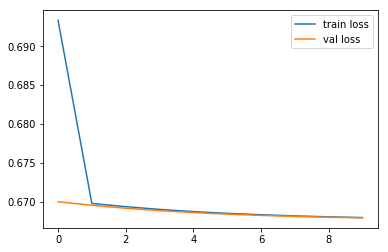

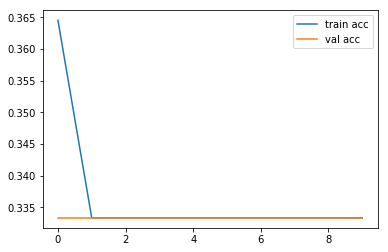

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')